# Netflix Motivations - Data Science Project

Welcome to the Netflix Motivations project! 

**Contributors**: *Christian Rhodes* and *Drew Jepson*

# The Data

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Read in the data and store in a DataFrame
df = pd.read_csv("data/titles.csv")

# Print the first 5 rows of the DataFrame
df.dropna(inplace=True)
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
26,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,8.1,2151.0,1.487,7.000
35,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,8.9,308824.0,130.213,8.301
44,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,tt0083437,6.9,34115.0,50.267,7.500
45,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,"['animation', 'family', 'comedy', 'fantasy', '...",['GB'],24.0,tt0086815,6.5,5104.0,42.196,6.500


# Classification Tree

In [18]:
# Convert the IMDB score into categories
bins = [0, 4, 7, 10]
labels = ['low', 'medium', 'high']
df['imdb_category'] = pd.cut(df['imdb_score'], bins=bins, labels=labels)

In [19]:
# Select the features and target variable
X = df[['runtime', 'release_year', 'imdb_votes','tmdb_popularity',]]
y = df['imdb_category']

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Create an instance of the DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

In [22]:
# Train the model on the training set
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [23]:
# Predict the target variable for the testing set
y_pred = tree.predict(X_test)

In [24]:
# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

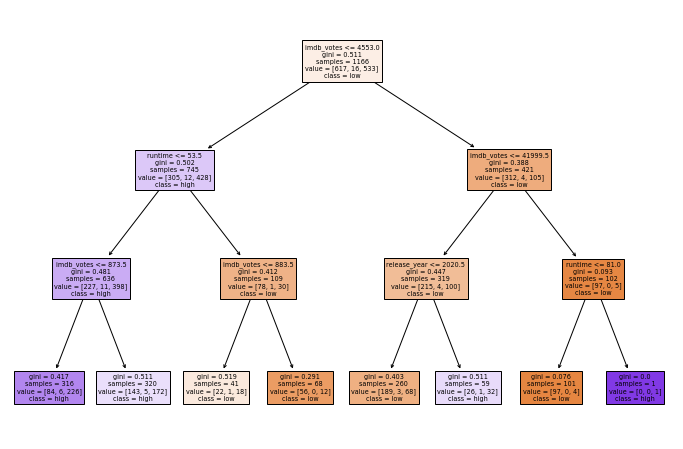

In [25]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=labels, filled=True)
plt.show()